# House Price Project

## 1 Exploratory Data Analysis

### 1.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# import pickle
import pickle

### 1.2 Data Overview

In [2]:
# Reading the dataset
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# identify the data types
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
# identify all the nan values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# Display the columns with missing values
df.isna().sum()[df.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## 2 Missing Data

### 2.1 Finding Missing Values

In [7]:
# drop the columns with missing values more than 50%
df = df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1)

In [8]:
# Display the columns with missing values
df.isna().sum()[df.isna().sum() > 0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [9]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

### 2.2 Handling missing data

In [10]:
# display the catergorical columns with missing values
df.select_dtypes('object').isna().sum()[df.select_dtypes('object').isna().sum() > 0]

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [11]:
cols = ['Electrical', 'BsmtExposure', 'BsmtFinType2', 'GarageFinish', 'GarageQual', 
        'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'GarageType']

for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0]) # fill the missing values with the mode

In [12]:
# Display the missing values in the numerical columns
df.select_dtypes(['int64', 'float64']).isna().sum()[df.select_dtypes(['int64', 'float64']).isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define the columns to be imputed
num_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Initialize the IterativeImputer
imputer = IterativeImputer()

# Perform the imputation on the selected columns
df[num_cols] = imputer.fit_transform(df[num_cols])

In [14]:
# show the dtypes of the columns with missing values
df[df.columns[df.isnull().sum() > 0]].dtypes # no more missing values

Series([], dtype: object)

In [15]:
# identify all missing values
df.isna().sum()[df.isna().sum() > 0] # no more missing values

Series([], dtype: int64)

In [16]:
# drop the column CentralAir
df = df.drop(['CentralAir'], axis=1)

In [17]:
# identify all missing values
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

## 3 Finding Unique Values

In [18]:
# identify the unique values for categorical columns
df.select_dtypes('object').nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [19]:
# identify the unique values for MSZoning
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [20]:
# identify all the unique values for utilities
df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [21]:
# identify the unique values for Condition2
df['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [22]:
# identify the unique values for GarageType
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

### 3.1 Graphs

Id                  Axes(0.125,0.814746;0.133621x0.0652542)
MSSubClass       Axes(0.285345,0.814746;0.133621x0.0652542)
LotFrontage       Axes(0.44569,0.814746;0.133621x0.0652542)
LotArea          Axes(0.606034,0.814746;0.133621x0.0652542)
OverallQual      Axes(0.766379,0.814746;0.133621x0.0652542)
OverallCond         Axes(0.125,0.736441;0.133621x0.0652542)
YearBuilt        Axes(0.285345,0.736441;0.133621x0.0652542)
YearRemodAdd      Axes(0.44569,0.736441;0.133621x0.0652542)
MasVnrArea       Axes(0.606034,0.736441;0.133621x0.0652542)
BsmtFinSF1       Axes(0.766379,0.736441;0.133621x0.0652542)
BsmtFinSF2          Axes(0.125,0.658136;0.133621x0.0652542)
BsmtUnfSF        Axes(0.285345,0.658136;0.133621x0.0652542)
TotalBsmtSF       Axes(0.44569,0.658136;0.133621x0.0652542)
1stFlrSF         Axes(0.606034,0.658136;0.133621x0.0652542)
2ndFlrSF         Axes(0.766379,0.658136;0.133621x0.0652542)
LowQualFinSF        Axes(0.125,0.579831;0.133621x0.0652542)
GrLivArea        Axes(0.285345,0.579831;

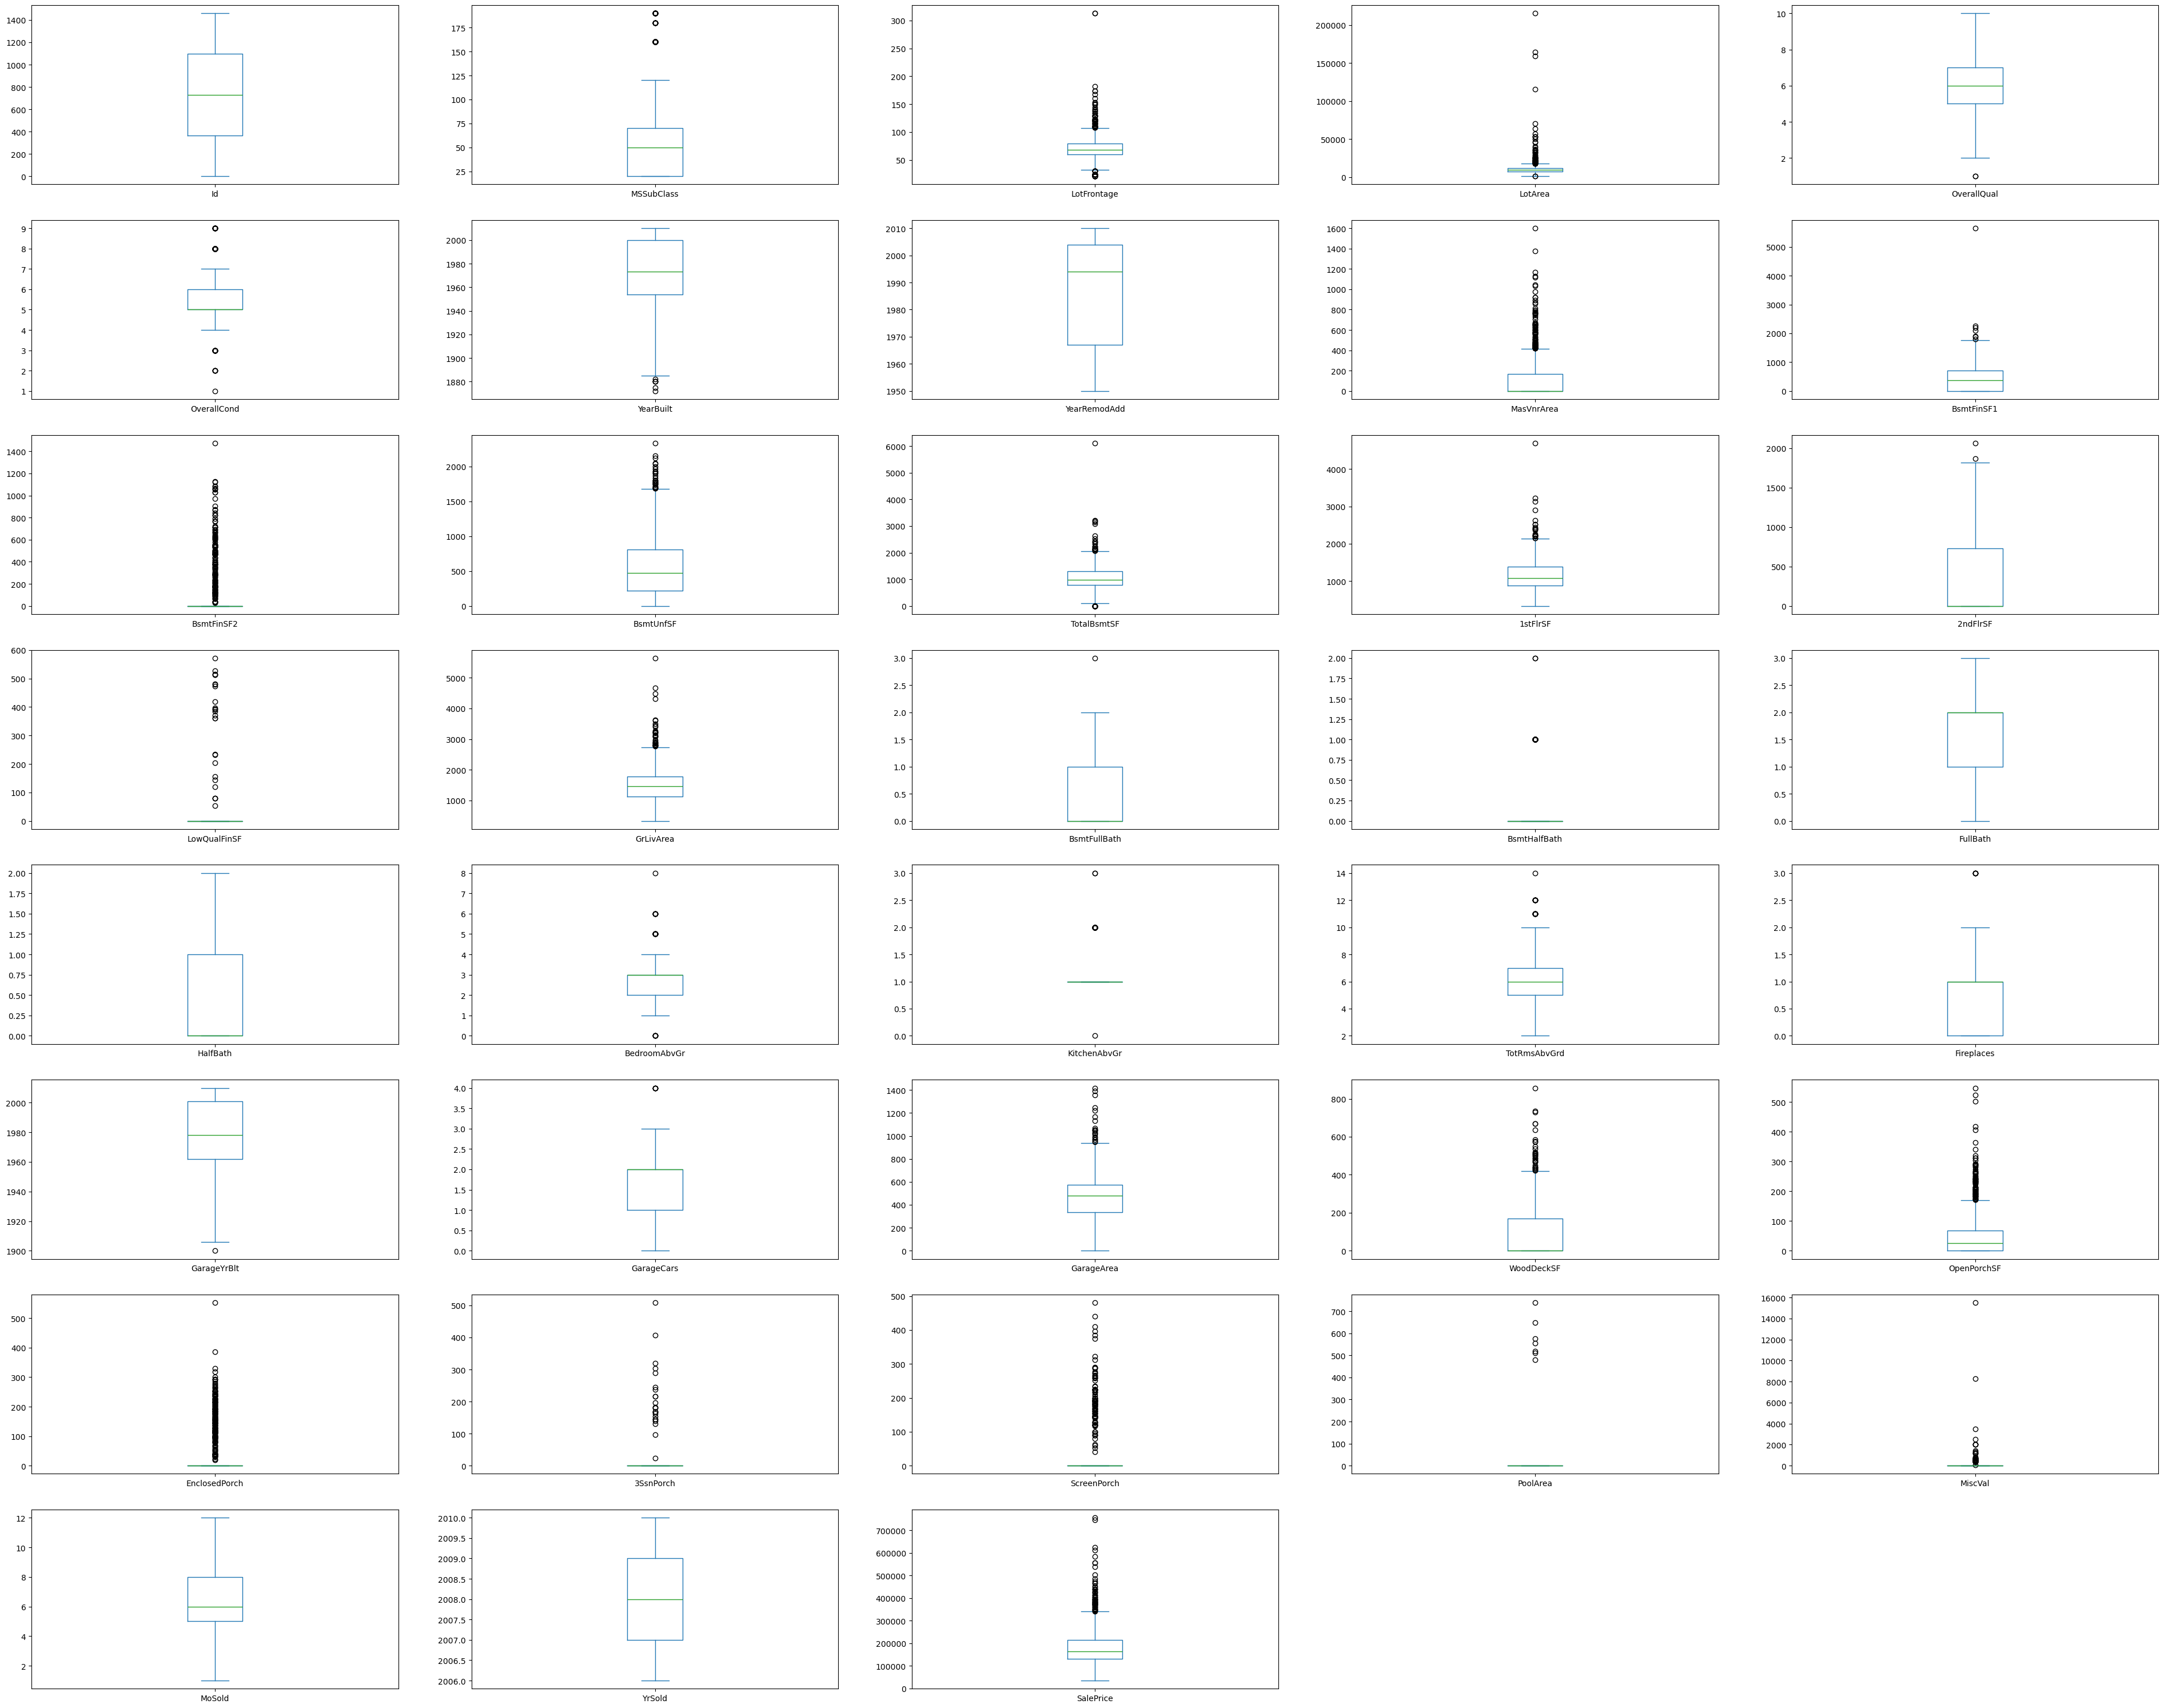

In [23]:
# box plot
df.plot(kind='box', subplots=True, layout=(10,5), sharex=False, sharey=False, figsize=(48,48))

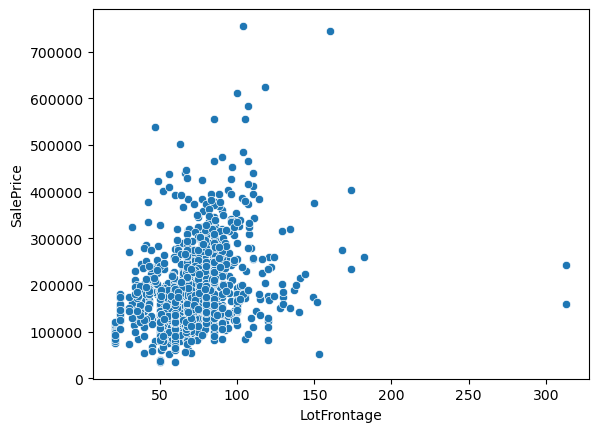

In [24]:
# scatter plot of LotFrontage and SalePrice
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df)
plt.show()

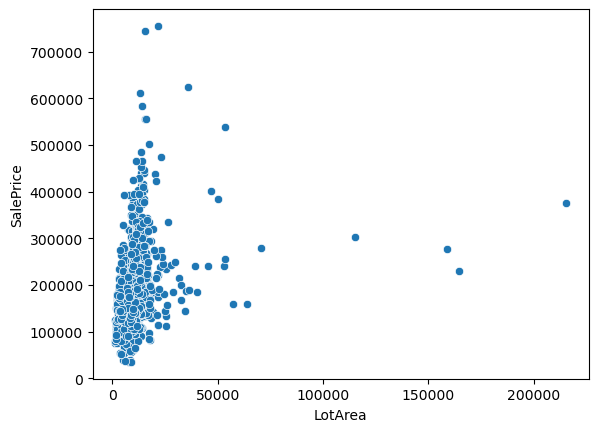

In [25]:
# scatter plot of LotArea and SalePrice
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.show()

In [26]:
# show all values in OverallQual
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

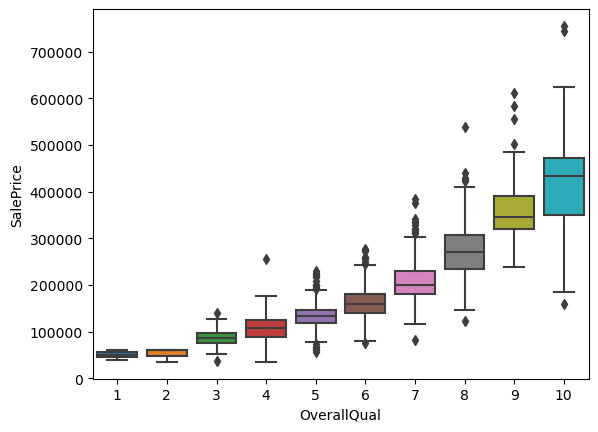

In [27]:
# draw a box plot of OverallQual and SalePrice
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

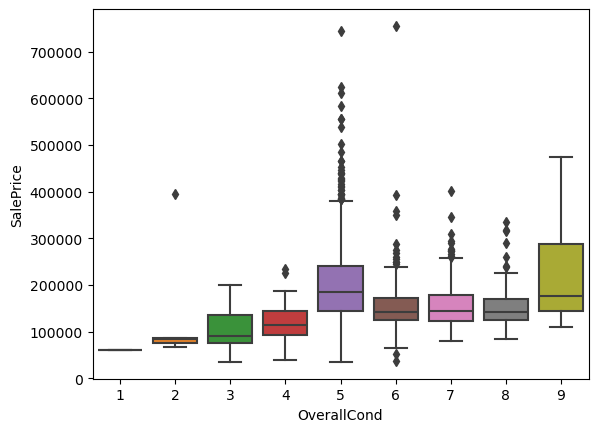

In [28]:
# draw a box plot of OverallCond and SalePrice
sns.boxplot(x='OverallCond', y='SalePrice', data=df)
plt.show()

In [29]:
# count the data point per OverallCond
df['OverallCond'].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

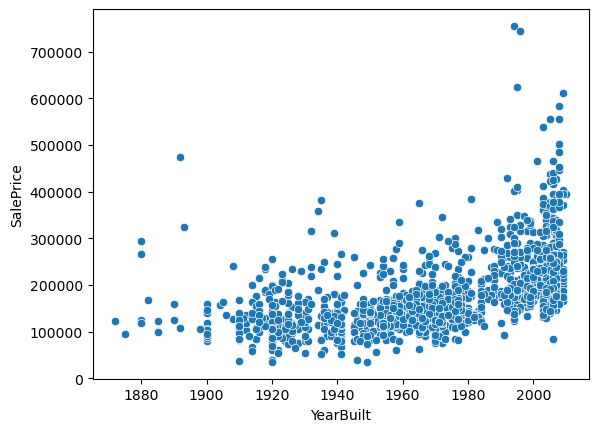

In [30]:
# scatter plot of YearBuilt and SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.show()

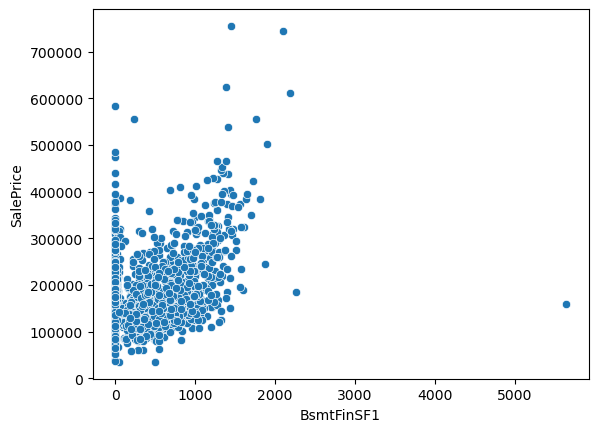

In [31]:
#  scatter plot of BsmtFinSF1 and SalePrice
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=df)
plt.show()

### 3.2 Removing outliers

In [32]:
# drop the row with BsmtFinSF1 value over 5000
df.drop(df[df['BsmtFinSF1'] > 5000].index, inplace = True)

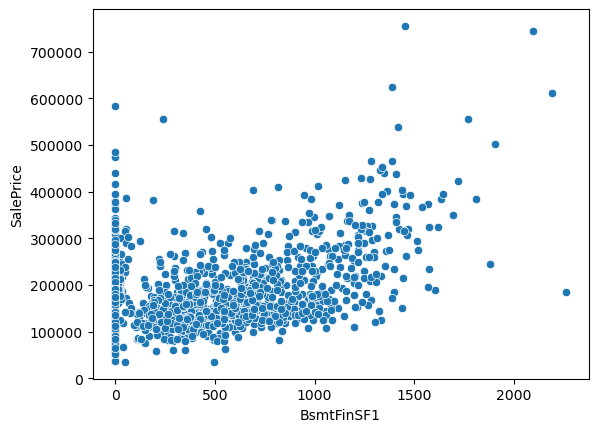

In [33]:
#  scatter plot of BsmtFinSF1 and SalePrice
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=df)
plt.show()

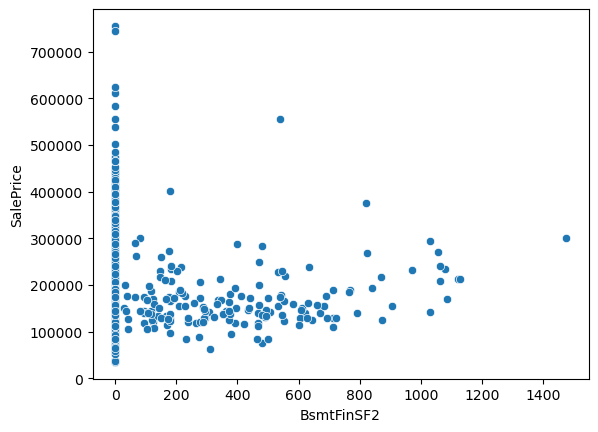

In [34]:
# scatter plot of BsmtFinSF2 and SalePrice
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=df)
plt.show()

In [35]:
# drop the row with BsmtFinSF2 value over 1400
df.drop(df[df['BsmtFinSF2'] > 1400].index, inplace = True)

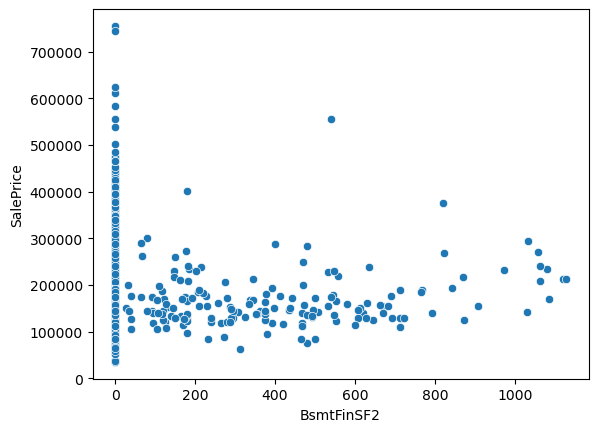

In [36]:
# scatter plot of BsmtFinSF2 and SalePrice
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=df)
plt.show()

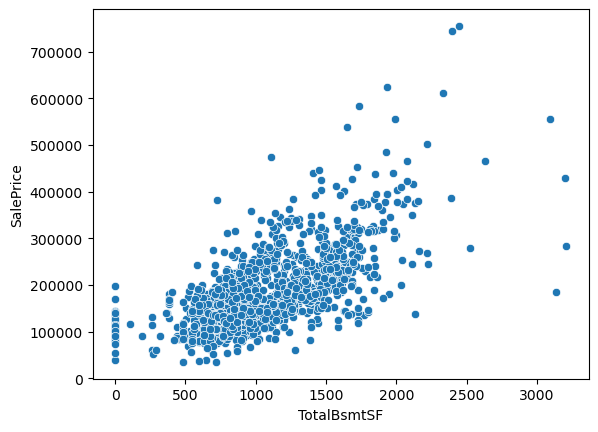

In [37]:
# scatter plot of TotalBsmtSF and SalePrice
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.show()

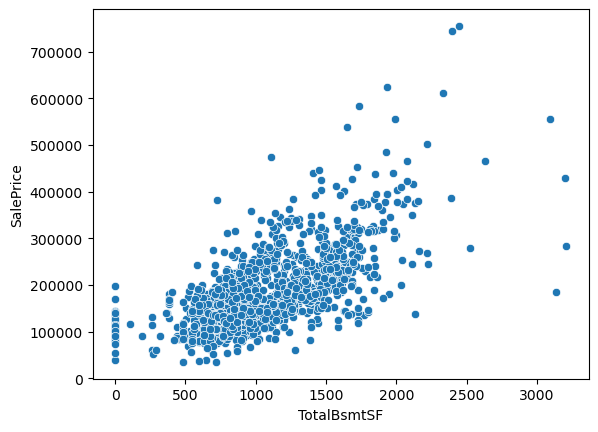

In [38]:
# draw a scatter plot of TotalBsmtSF and SalePrice
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.show()

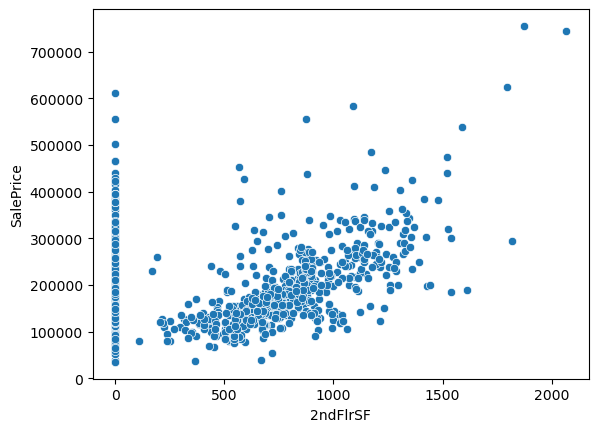

In [39]:
# draw a scatter plot of 2ndFlrSF and SalePrice
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=df)
plt.show()

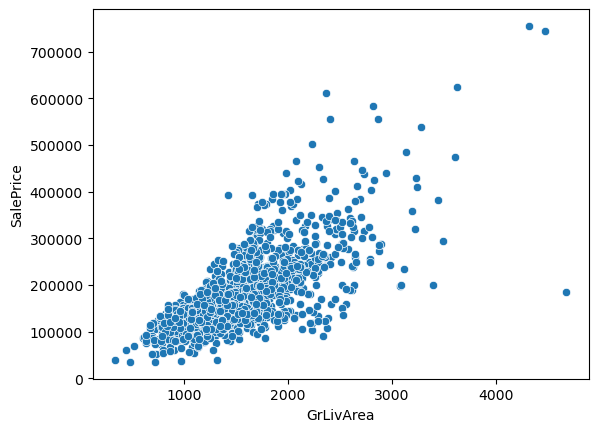

In [40]:
# draw a scatter plot of GrLivArea and SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

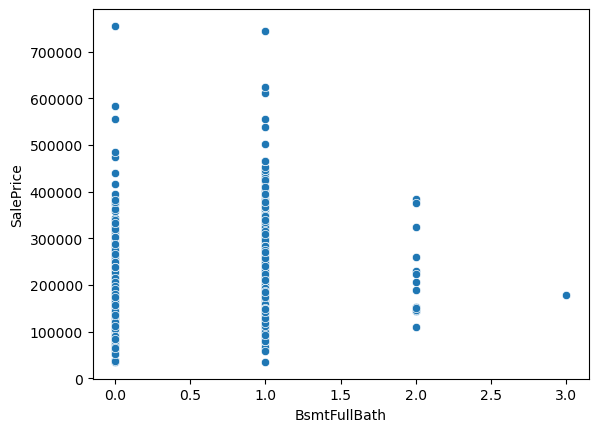

In [41]:
# draw a scatter plot of BsmtFullBath and SalePrice
sns.scatterplot(x='BsmtFullBath', y='SalePrice', data=df)
plt.show()

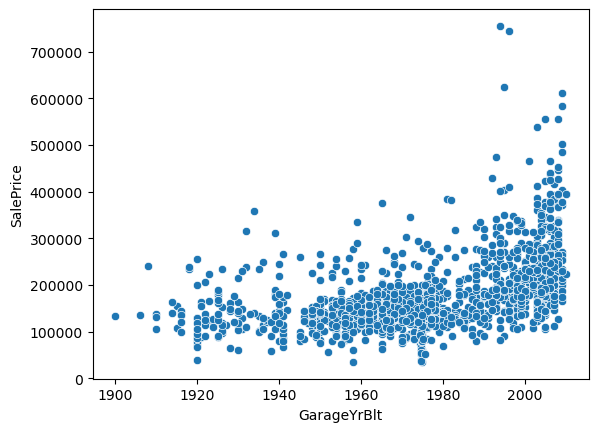

In [42]:
# scatter plot of GarageYrBlt and SalePrice
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=df)
plt.show()

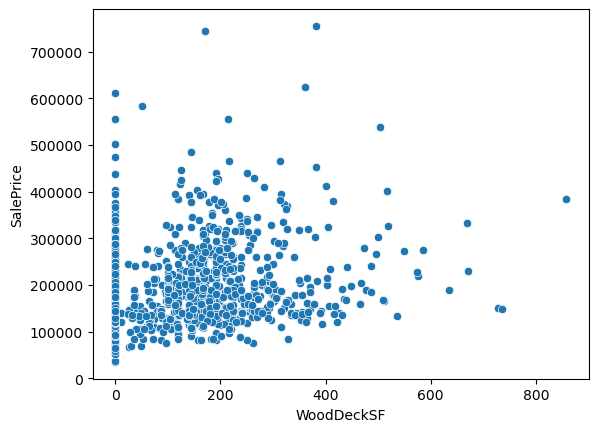

In [43]:
# draw a scatter plot of WoodDeckSF and SalePrice
sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=df)
plt.show()

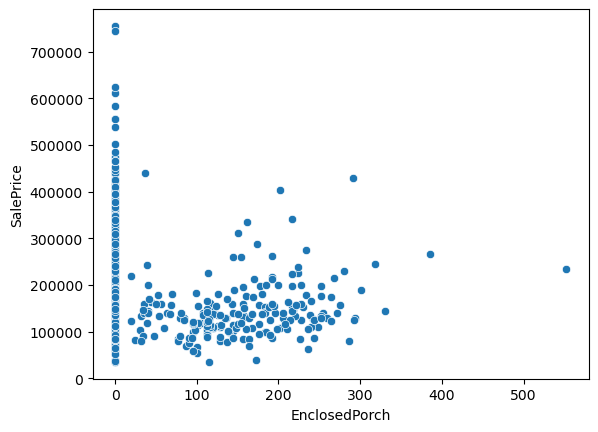

In [44]:
# draw a scatter plot of EnclosedPorch and SalePrice
sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=df)
plt.show()

In [45]:
# drop the row with EnclosedPorch value over 500
df.drop(df[df['EnclosedPorch'] > 500].index, inplace = True)

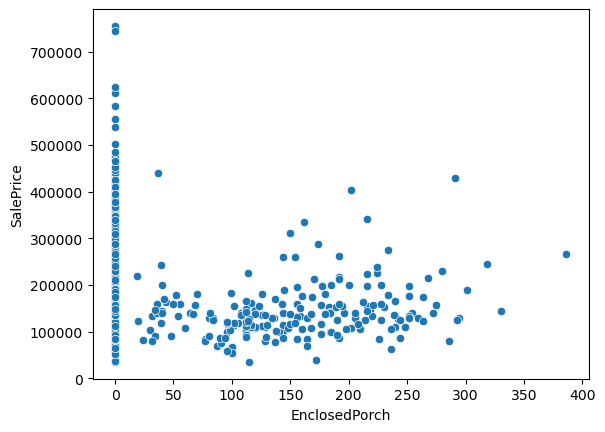

In [46]:
# draw a scatter plot of EnclosedPorch and SalePrice
sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=df)
plt.show()

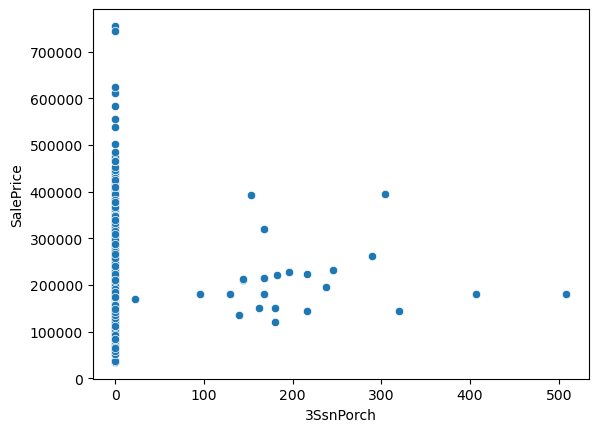

In [47]:
# draw a scatter plot of 3SsnPorch and SalePrice
sns.scatterplot(x='3SsnPorch', y='SalePrice', data=df)
plt.show()

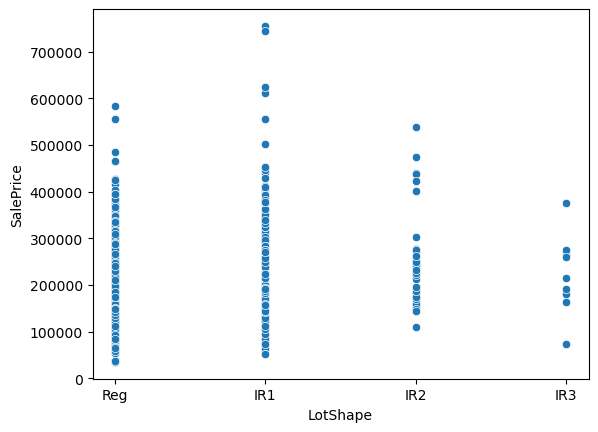

In [48]:
# draw a scatter plot of Lotshape and SalePrice
sns.scatterplot(x='LotShape', y='SalePrice', data=df)
plt.show()

### 3.4 Heatmap

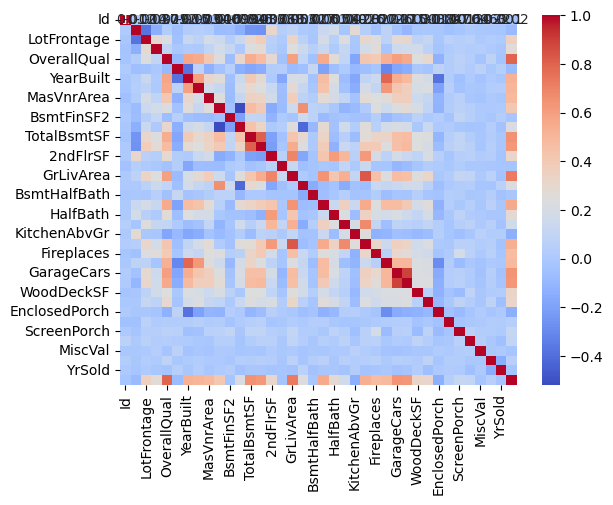

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numerical_df.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

### 3.5 Removing irrelevant columns

In [50]:
# drop the Id column
df = df.drop(['Id'], axis=1)

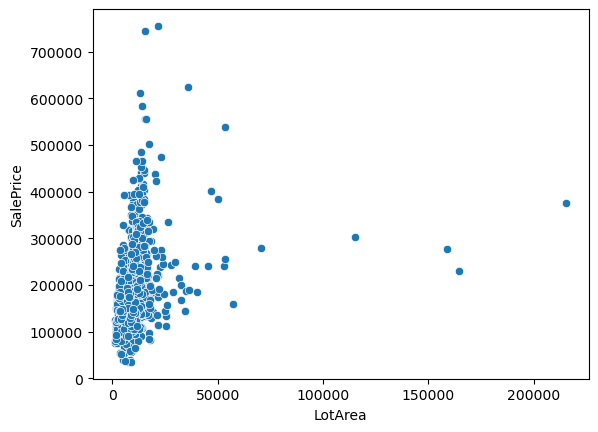

In [51]:
# draw a scatter plot
sns.scatterplot(x='LotArea', y='SalePrice', data=df) # scatter plot of LotArea and SalePrice
plt.show() 

In [52]:
# drop the column Lotshape
df = df.drop(['LotShape'], axis=1)

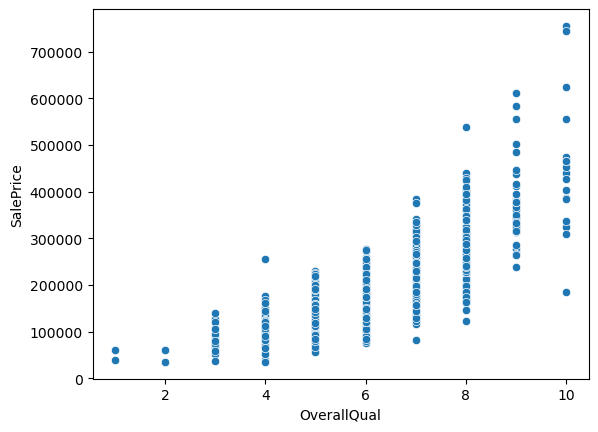

In [53]:
# draw a scatter plot of overallQual and SalePrice
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

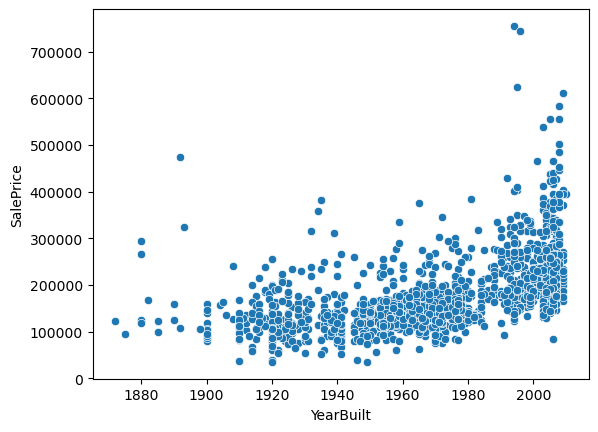

In [54]:
# draw a scatter plot of YearBuilt and SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.show()

### 3.6 Encoding

In [55]:
# list all the unique values in each of the categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywo

In [56]:
# convert the categorical columns to numerical columns using ordinal encoding
df['MSZoning'] = df['MSZoning'].map({'RL':0, 'RM':1, 'C (all)':2, 'FV':3, 'RH' :4})
df['Street'] = df['Street'].map({'Pave':0, 'Grvl':1})
df['LandContour'] = df['LandContour'].map({'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3})
df['Utilities'] = df['Utilities'].map({'AllPub':0, 'NoSeWa':1})
df['LotConfig'] = df['LotConfig'].map({'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4})
df['LandSlope'] = df['LandSlope'].map({'Gtl':0, 'Mod':1, 'Sev':2})
df['Neighborhood'] = df['Neighborhood'].map({'CollgCr':0, 'Veenker':1, 'Crawfor':2, 'NoRidge':3, 'Mitchel':4,
       'Somerst':5, 'NWAmes':6, 'OldTown':7, 'BrkSide':8, 'Sawyer':9, 'NridgHt':10,
       'NAmes':11, 'SawyerW':12, 'IDOTRR':13, 'MeadowV':14, 'Edwards':15, 'Timber':16,
       'Gilbert':17, 'StoneBr':18, 'ClearCr':19, 'NPkVill':20, 'Blmngtn':21, 'BrDale':22,
       'SWISU':23, 'Blueste':24})
df['Condition1'] = df['Condition1'].map({'Norm':0, 'Feedr':1, 'PosN':2, 'Artery':3, 'RRAe':4, 'PosA':5,
       'RRNn':6, 'RRAn':7, 'RRNe':8})
df['Condition2'] = df['Condition2'].map({'Norm':0, 'Artery':1, 'RRNn':2, 'Feedr':3, 'PosN':4, 'PosA':5,
       'RRAn':6, 'RRAe':7})
df['BldgType'] = df['BldgType'].map({'1Fam':0, '2fmCon':1, 'Duplex':2, 'Twnhs':3, 'TwnhsE':4})
df['HouseStyle'] = df['HouseStyle'].map({'1Story':0, '1.5Fin':1, '1.5Unf':2, '2Story':3, '2.5Fin':4, '2.5Unf':5,
       'SFoyer':6, 'SLvl':7})
df['RoofStyle'] = df['RoofStyle'].map({'Gable':0, 'Hip':1, 'Gambrel':2, 'Mansard':3, 'Flat':4, 'Shed':5})
df['RoofMatl'] = df['RoofMatl'].map({'CompShg':0, 'WdShngl':1, 'Metal':2, 'WdShake':3, 'ClyTile':4, 'Membran':5,
       'Roll':6, 'Tar&Grv':7})
df['Exterior1st'] = df['Exterior1st'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5,
       'BrkFace':6, 'WdShing':7, 'AsbShng':8, 'Stucco':9, 'BrkComm':10, 'AsphShn':11, 'Stone':12,
       'ImStucc':13})
df['Exterior2nd'] = df['Exterior2nd'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5,
       'Wd Shng':6, 'BrkFace':7, 'Stucco':8, 'AsbShng':9, 'Brk Cmn':10, 'ImStucc':11, 'AsphShn':12,
       'Stone':13, 'Other':14})
df['ExterQual'] = df['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['ExterCond'] = df['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Foundation'] = df['Foundation'].map({'PConc':0, 'CBlock':1, 'BrkTil':2, 'Wood':3, 'Slab':4, 'Stone':5})
df['BsmtQual'] = df['BsmtQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['BsmtCond'] = df['BsmtCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['BsmtExposure'] = df['BsmtExposure'].map({'No':0, 'Mn':1, 'Av':2, 'Gd':3})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Electrical'] = df['Electrical'].map({'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Functional'] = df['Functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
df['GarageType'] = df['GarageType'].map({'Detchd':0, 'CarPort':1, 'BuiltIn':2, 'Attchd':3, 'Basment':4, '2Types':5})
df['GarageFinish'] = df['GarageFinish'].map({'Unf':0, 'RFn':1, 'Fin':2})
df['GarageQual'] = df['GarageQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['GarageCond'] = df['GarageCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['PavedDrive'] = df['PavedDrive'].map({'N':0, 'P':1, 'Y':2})
df['SaleType'] = df['SaleType'].map({'WD':0, 'CWD':1, 'VWD':2, 'New':3, 'COD':4, 'Con':5, 'ConLw':6, 'ConLI':7, 'ConLD':8, 'Oth':9})
df['SaleCondition'] = df['SaleCondition'].map({'Normal':0, 'Abnorml':1, 'AdjLand':2, 'Alloca':3, 'Family':4, 'Partial':5})
df['Heating'] = df['Heating'].map({'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4})


In [57]:
# list nurmerical columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenP

In [58]:
# display columns which are not numerical
df.select_dtypes('object').columns

Index([], dtype='object')

In [59]:
# missing values in the heating column
df['Heating'].isna().sum()

1

In [60]:
# missing values in the Exterior1st column
df['Exterior1st'].isna().sum()

1

In [61]:
# missing values in the Exterior2nd column
df['Exterior2nd'].isna().sum()

1

In [62]:
# impute the missing values in the heating column with the mode
df['Heating'] = df['Heating'].fillna(df['Heating'].mode()[0])

# drop the rows with missing values in Exterior1st and Exterior2nd
df = df.dropna(subset=['Exterior1st', 'Exterior2nd'])

In [63]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,3,0,1,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,0,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,0,0,1,0,2,...,272,0,0,0,0,2,2006,0,1,140000
4,60,0,84.0,14260,0,0,0,3,0,3,...,0,0,0,0,0,12,2008,0,0,250000


## 4 Data Spliting

In [64]:
# Get all column names except 'SalePrice'
columns_except_saleprice = [col for col in df.columns if col!= 'SalePrice']

# Use these column names to create X
X = df[columns_except_saleprice]  # Make sure 'df' is used here instead of 'data'
y = df['SalePrice']

# shape of X and y
print(X.shape)
print(y.shape)

(1456, 71)
(1456,)


In [65]:
# training and testing split
from sklearn.model_selection import train_test_split # import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 70% training and 30% testing

## 5 Training the model

In [66]:
# fit the model with multiple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
# make predictions
y_pred = model.predict(X_test)

In [68]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 596216599.4646784
Root Mean Squared Error: 24417.546958379713
Mean Absolute Error: 18408.42670542574
R2 Score: 0.8666963277291306


## Making Predictions for submission

In [69]:
# load the data
submission_data = pd.read_csv('data/test.csv')
submission_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### 5.1 Missing values in test.csv

In [70]:
# drop the columns that were dropped to train the model
submission_data = submission_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType', 'CentralAir', 'LotShape'], axis=1)

In [71]:
# display only the columns with missing values
submission_data.isna().sum()[submission_data.isna().sum() > 0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [72]:
# display the catergorical columns with missing values
submission_data.select_dtypes('object').isna().sum()[submission_data.select_dtypes('object').isna().sum() > 0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
KitchenQual      1
Functional       2
GarageType      76
GarageFinish    78
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

In [73]:
# impute the missing in the categorical columns with the mode
submission_data['MSZoning'] = submission_data['MSZoning'].fillna(submission_data['MSZoning'].mode()[0])
submission_data['Utilities'] = submission_data['Utilities'].fillna(submission_data['Utilities'].mode()[0])
submission_data['Exterior1st'] = submission_data['Exterior1st'].fillna(submission_data['Exterior1st'].mode()[0])
submission_data['Exterior2nd'] = submission_data['Exterior2nd'].fillna(submission_data['Exterior2nd'].mode()[0])
submission_data['KitchenQual'] = submission_data['KitchenQual'].fillna(submission_data['KitchenQual'].mode()[0])
submission_data['BsmtQual'] = submission_data['BsmtQual'].fillna(submission_data['BsmtQual'].mode()[0])
submission_data['BsmtCond'] = submission_data['BsmtCond'].fillna(submission_data['BsmtCond'].mode()[0])
submission_data['BsmtExposure'] = submission_data['BsmtExposure'].fillna(submission_data['BsmtExposure'].mode()[0])
submission_data['BsmtFinType1'] = submission_data['BsmtFinType1'].fillna(submission_data['BsmtFinType1'].mode()[0])
submission_data['BsmtFinType2'] = submission_data['BsmtFinType2'].fillna(submission_data['BsmtFinType2'].mode()[0])
submission_data['KitchenQual'] = submission_data['KitchenQual'].fillna(submission_data['KitchenQual'].mode()[0])
submission_data['Functional'] = submission_data['Functional'].fillna(submission_data['Functional'].mode())
submission_data['GarageType'] = submission_data['GarageType'].fillna(submission_data['GarageType'].mode()[0])
submission_data['GarageFinish'] = submission_data['GarageFinish'].fillna(submission_data['GarageFinish'].mode()[0])
submission_data['GarageQual'] = submission_data['GarageQual'].fillna(submission_data['GarageQual'].mode()[0])
submission_data['GarageCond'] = submission_data['GarageCond'].fillna(submission_data['GarageCond'].mode()[0])
submission_data['SaleType'] = submission_data['SaleType'].fillna(submission_data['SaleType'].mode()[0])
submission_data['Functional'] = submission_data['Functional'].fillna(submission_data['Functional'].mode()[0])

In [74]:
# display the missing values in the categorical columns
submission_data.select_dtypes('object').isna().sum()[submission_data.select_dtypes('object').isna().sum() > 0]

Series([], dtype: int64)

In [75]:
# display the missing values in the numerical columns
submission_data.select_dtypes(['int64', 'float64']).isna().sum()[submission_data.select_dtypes(['int64', 'float64']).isna().sum() > 0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [76]:
# impute the missing in the numerical columns with the mean
submission_data['LotFrontage'] = submission_data['LotFrontage'].fillna(submission_data['LotFrontage'].mean())
submission_data['MasVnrArea'] = submission_data['MasVnrArea'].fillna(submission_data['MasVnrArea'].mean())
submission_data['BsmtFinSF1'] = submission_data['BsmtFinSF1'].fillna(submission_data['BsmtFinSF1'].mean())
submission_data['BsmtFinSF2'] = submission_data['BsmtFinSF2'].fillna(submission_data['BsmtFinSF2'].mean())
submission_data['BsmtUnfSF'] = submission_data['BsmtUnfSF'].fillna(submission_data['BsmtUnfSF'].mean())
submission_data['TotalBsmtSF'] = submission_data['TotalBsmtSF'].fillna(submission_data['TotalBsmtSF'].mean())
submission_data['BsmtFullBath'] = submission_data['BsmtFullBath'].fillna(submission_data['BsmtFullBath'].mean())
submission_data['BsmtHalfBath'] = submission_data['BsmtHalfBath'].fillna(submission_data['BsmtHalfBath'].mean())
submission_data['GarageYrBlt'] = submission_data['GarageYrBlt'].fillna(submission_data['GarageYrBlt'].mean())
submission_data['GarageCars'] = submission_data['GarageCars'].fillna(submission_data['GarageCars'].mean())
submission_data['GarageArea'] = submission_data['GarageArea'].fillna(submission_data['GarageArea'].mean())

In [77]:
# show the number of missing values in each column
submission_data.isna().sum()[submission_data.isna().sum() > 0]

Series([], dtype: int64)

In [78]:
# display all the missing values
submission_data.isna().sum()[submission_data.isna().sum() > 0]

Series([], dtype: int64)

In [79]:
# show all the columns with unique values
submission_data.nunique()

Id               1459
MSSubClass         16
MSZoning            5
LotFrontage       116
LotArea          1106
                 ... 
MiscVal            26
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Length: 72, dtype: int64

#### 5.2 Encoding in test.csv

In [80]:
# convert the categorical columns to numerical columns using ordinal encoding
submission_data['MSZoning'] = submission_data['MSZoning'].map({'RL':0, 'RM':1, 'C (all)':2, 'FV':3, 'RH':4})
submission_data['Street'] = submission_data['Street'].map({'Pave':0, 'Grvl':1})
submission_data['LandContour'] = submission_data['LandContour'].map({'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3})
submission_data['Utilities'] = submission_data['Utilities'].map({'AllPub':0, 'NoSeWa':1})
submission_data['LotConfig'] = submission_data['LotConfig'].map({'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4})
submission_data['LandSlope'] = submission_data['LandSlope'].map({'Gtl':0, 'Mod':1, 'Sev':2})
submission_data['Neighborhood'] = submission_data['Neighborhood'].map({'CollgCr':0, 'Veenker':1, 'Crawfor':2, 'NoRidge':3, 'Mitchel':4,
       'Somerst':5, 'NWAmes':6, 'OldTown':7, 'BrkSide':8, 'Sawyer':9, 'NridgHt':10,
       'NAmes':11, 'SawyerW':12, 'IDOTRR':13, 'MeadowV':14, 'Edwards':15, 'Timber':16,
       'Gilbert':17, 'StoneBr':18, 'ClearCr':19, 'NPkVill':20, 'Blmngtn':21, 'BrDale':22,
       'SWISU':23, 'Blueste':24})
submission_data['Condition1'] = submission_data['Condition1'].map({'Norm':0, 'Feedr':1, 'PosN':2, 'Artery':3, 'RRAe':4, 'PosA':5,
       'RRNn':6, 'RRAn':7, 'RRNe':8})
submission_data['Condition2'] = submission_data['Condition2'].map({'Norm':0, 'Artery':1, 'RRNn':2, 'Feedr':3, 'PosN':4, 'PosA':5,
       'RRAn':6, 'RRAe':7})
submission_data['BldgType'] = submission_data['BldgType'].map({'1Fam':0, '2fmCon':1, 'Duplex':2, 'Twnhs':3, 'TwnhsE':4})
submission_data['HouseStyle'] = submission_data['HouseStyle'].map({'1Story':0, '1.5Fin':1, '1.5Unf':2, '2Story':3, '2.5Fin':4, '2.5Unf':5,
       'SFoyer':6, 'SLvl':7})
submission_data['RoofStyle'] = submission_data['RoofStyle'].map({'Gable':0, 'Hip':1, 'Gambrel':2, 'Mansard':3, 'Flat':4, 'Shed':5})
submission_data['RoofMatl'] = submission_data['RoofMatl'].map({'CompShg':0, 'WdShngl':1, 'Metal':2, 'WdShake':3, 'ClyTile':4, 'Membran':5,
       'Roll':6, 'Tar&Grv':7})
submission_data['Exterior1st'] = submission_data['Exterior1st'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5,
       'BrkFace':6, 'WdShing':7, 'AsbShng':8, 'Stucco':9, 'BrkComm':10, 'AsphShn':11, 'Stone':12,
       'ImStucc':13})
submission_data['Exterior2nd'] = submission_data['Exterior2nd'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5,
       'Wd Shng':6, 'BrkFace':7, 'Stucco':8, 'AsbShng':9, 'Brk Cmn':10, 'ImStucc':11, 'AsphShn':12,
       'Stone':13, 'Other':14})
submission_data['ExterQual'] = submission_data['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['ExterCond'] = submission_data['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['Foundation'] = submission_data['Foundation'].map({'PConc':0, 'CBlock':1, 'BrkTil':2, 'Wood':3, 'Slab':4, 'Stone':5})
submission_data['BsmtQual'] = submission_data['BsmtQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['BsmtCond'] = submission_data['BsmtCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['BsmtExposure'] = submission_data['BsmtExposure'].map({'No':0, 'Mn':1, 'Av':2, 'Gd':3})
submission_data['BsmtFinType1'] = submission_data['BsmtFinType1'].map({'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5})
submission_data['BsmtFinType2'] = submission_data['BsmtFinType2'].map({'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5})
submission_data['HeatingQC'] = submission_data['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['Electrical'] = submission_data['Electrical'].map({'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4})
submission_data['KitchenQual'] = submission_data['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['Functional'] = submission_data['Functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
submission_data['GarageType'] = submission_data['GarageType'].map({'Detchd':0, 'CarPort':1, 'BuiltIn':2, 'Attchd':3, 'Basment':4, '2Types':5})
submission_data['GarageFinish'] = submission_data['GarageFinish'].map({'Unf':0, 'RFn':1, 'Fin':2})
submission_data['GarageQual'] = submission_data['GarageQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['GarageCond'] = submission_data['GarageCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['PavedDrive'] = submission_data['PavedDrive'].map({'N':0, 'P':1, 'Y':2})
submission_data['SaleType'] = submission_data['SaleType'].map({'WD':0, 'CWD':1, 'VWD':2, 'New':3, 'COD':4, 'Con':5, 'ConLw':6, 'ConLI':7, 'ConLD':8, 'Oth':9})
submission_data['SaleCondition'] = submission_data['SaleCondition'].map({'Normal':0, 'Abnorml':1, 'AdjLand':2, 'Alloca':3, 'Family':4, 'Partial':5})
submission_data['Heating'] = submission_data['Heating'].map({'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4})


In [81]:
# show the records with nan values
submission_data.isna().sum()[submission_data.isna().sum() > 0]

Exterior1st    1
Exterior2nd    2
dtype: int64

In [82]:
# impute the missing values in Exterior1st and Exterior2nd with the mode
submission_data['Exterior1st'] = submission_data['Exterior1st'].fillna(submission_data['Exterior1st'].mode()[0])
submission_data['Exterior2nd'] = submission_data['Exterior2nd'].fillna(submission_data['Exterior2nd'].mode()[0])
submission_data.isna().sum()[submission_data.isna().sum() > 0]

Series([], dtype: int64)

### Making submission

In [83]:
# make a new variable X_submission
X_submission = submission_data.drop(['Id'], axis=1)
X_submission

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,4,80.0,11622,0,0,0,0,0,11,...,0,0,0,120,0,0,6,2010,0,0
1,20,0,81.0,14267,0,0,0,1,0,11,...,36,0,0,0,0,12500,6,2010,0,0
2,60,0,74.0,13830,0,0,0,0,0,17,...,34,0,0,0,0,0,3,2010,0,0
3,60,0,78.0,9978,0,0,0,0,0,17,...,36,0,0,0,0,0,6,2010,0,0
4,120,0,43.0,5005,0,2,0,0,0,18,...,82,0,0,144,0,0,1,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1,21.0,1936,0,0,0,0,0,14,...,0,0,0,0,0,0,6,2006,0,0
1455,160,1,21.0,1894,0,0,0,0,0,14,...,24,0,0,0,0,0,4,2006,0,1
1456,20,0,160.0,20000,0,0,0,0,0,4,...,0,0,0,0,0,0,9,2006,0,1
1457,85,0,62.0,10441,0,0,0,0,0,4,...,32,0,0,0,0,700,7,2006,0,0


In [84]:
# make a new variable X_submission
X_submission = submission_data.drop(['Id'], axis=1)
X_submission

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,4,80.0,11622,0,0,0,0,0,11,...,0,0,0,120,0,0,6,2010,0,0
1,20,0,81.0,14267,0,0,0,1,0,11,...,36,0,0,0,0,12500,6,2010,0,0
2,60,0,74.0,13830,0,0,0,0,0,17,...,34,0,0,0,0,0,3,2010,0,0
3,60,0,78.0,9978,0,0,0,0,0,17,...,36,0,0,0,0,0,6,2010,0,0
4,120,0,43.0,5005,0,2,0,0,0,18,...,82,0,0,144,0,0,1,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1,21.0,1936,0,0,0,0,0,14,...,0,0,0,0,0,0,6,2006,0,0
1455,160,1,21.0,1894,0,0,0,0,0,14,...,24,0,0,0,0,0,4,2006,0,1
1456,20,0,160.0,20000,0,0,0,0,0,4,...,0,0,0,0,0,0,9,2006,0,1
1457,85,0,62.0,10441,0,0,0,0,0,4,...,32,0,0,0,0,700,7,2006,0,0


In [85]:
# make predictions
Submission_y_pred = model.predict(X_submission)
Submission_y_pred

array([118193.89142195, 177342.38332782, 174428.48341173, ...,
       181213.59202962, 108536.77051433, 239028.4359938 ])

In [86]:
# create a DataFrame with the Id and SalePrice
submission = pd.DataFrame({'Id': submission_data['Id'], 'SalePrice': Submission_y_pred})
submission.head()

,Id,SalePrice
0,1461,118193.891422
1,1462,177342.383328
2,1463,174428.483412
3,1464,183228.353082
4,1465,185194.390723


In [87]:
# save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)